In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')


In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
df = pd.read_csv("CC GENERAL.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [6]:
df.head(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   
5  C10006  1809.828751           1.000000    1333.28              0.00   
6  C10007   627.260806           1.000000    7091.01           6402.63   
7  C10008  1823.652743           1.000000     436.20              0.00   
8  C10009  1014.926473           1.000000     861.49            661.49   
9  C10010   152.225975           0.545455    1281.60           1281.60   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
3                    0.00    205.788017             0.083333   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   
6                  688.38      0.000000             1.000000   
7                  436.20      0.000000             1.000000   
8                  200.00      0.000000             0.333333   
9                    0.00      0.000000             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   
6                    1.000000                          1.000000   
7                    0.000000                          1.000000   
8                    0.083333                          0.250000   
9                    0.166667                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   
5                0.000000                 0              8        1800.0   
6                0.000000                 0             64       13500.0   
7                0.000000                 0             12        2300.0   
8                0.000000                 0              5        7000.0   
9                0.000000                 0              3       11000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12  
6  6354.314328        198.065894          1.000000      12  
7   679.065082        532.033990          0.000000      12  
8   688.278568        311.963409          0.000000      12  
9  1164.770591        100.302262          0.000000      12

In [7]:
df = df.drop(['CUST_ID'],axis = 1)
df.head(10)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   
6   627.260806           1.000000    7091.01           6402.63   
7  1823.652743           1.000000     436.20              0.00   
8  1014.926473           1.000000     861.49            661.49   
9   152.225975           0.545455    1281.60           1281.60   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
3                    0.00    205.788017             0.083333   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   
6                  688.38      0.000000             1.000000   
7                  436.20      0.000000             1.000000   
8                  200.00      0.000000             0.333333   
9                    0.00      0.000000             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   
6                    1.000000                          1.000000   
7                    0.000000                          1.000000   
8                    0.083333                          0.250000   
9                    0.166667                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   
5                0.000000                 0              8        1800.0   
6                0.000000                 0             64       13500.0   
7                0.000000                 0             12        2300.0   
8                0.000000                 0              5        7000.0   
9                0.000000                 0              3       11000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12  
6  6354.314328        198.065894          1.000000      12  
7   679.065082        532.033990          0.000000      12  
8   688.278568        311.963409          0.000000      12  
9  1164.770591        100.302262          0.000000      12

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

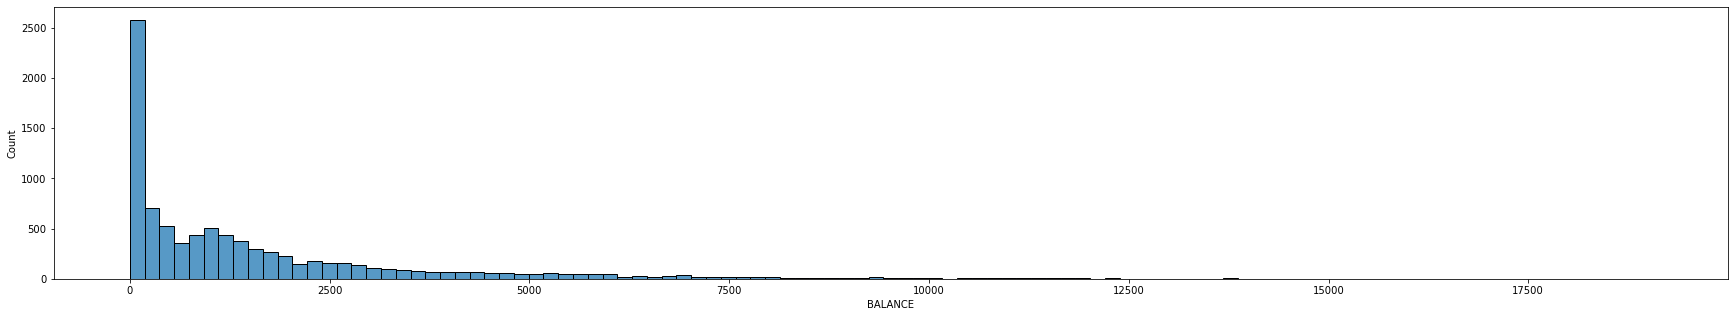

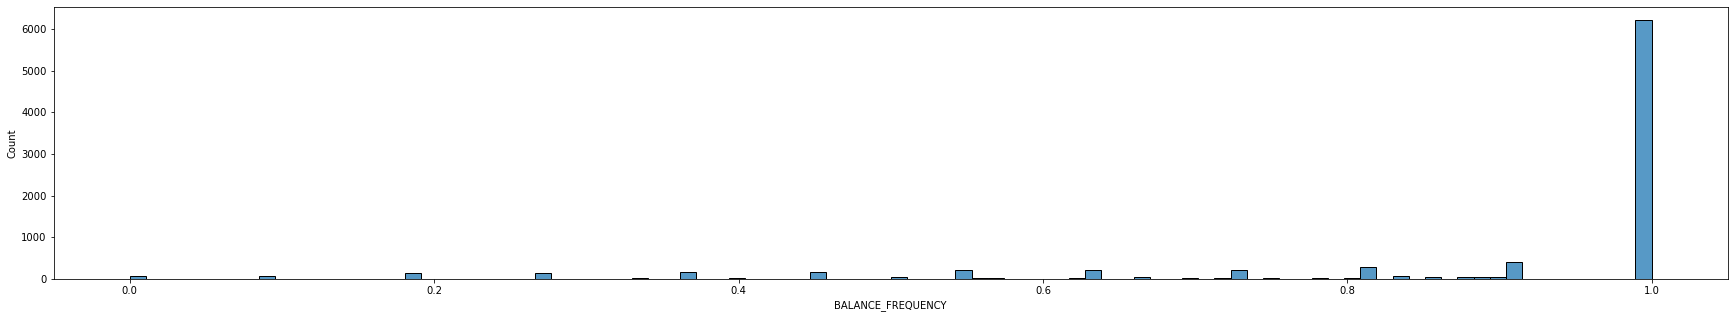

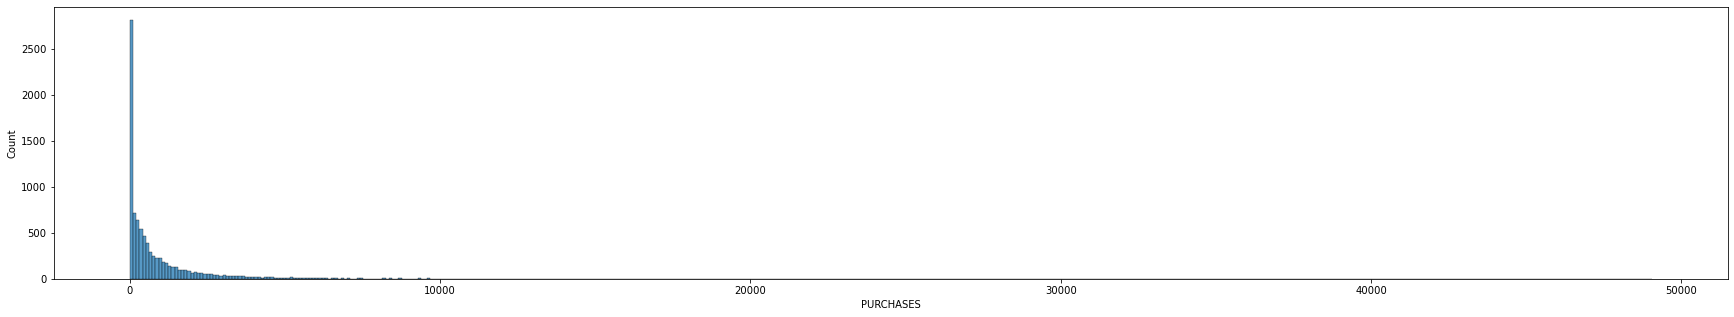

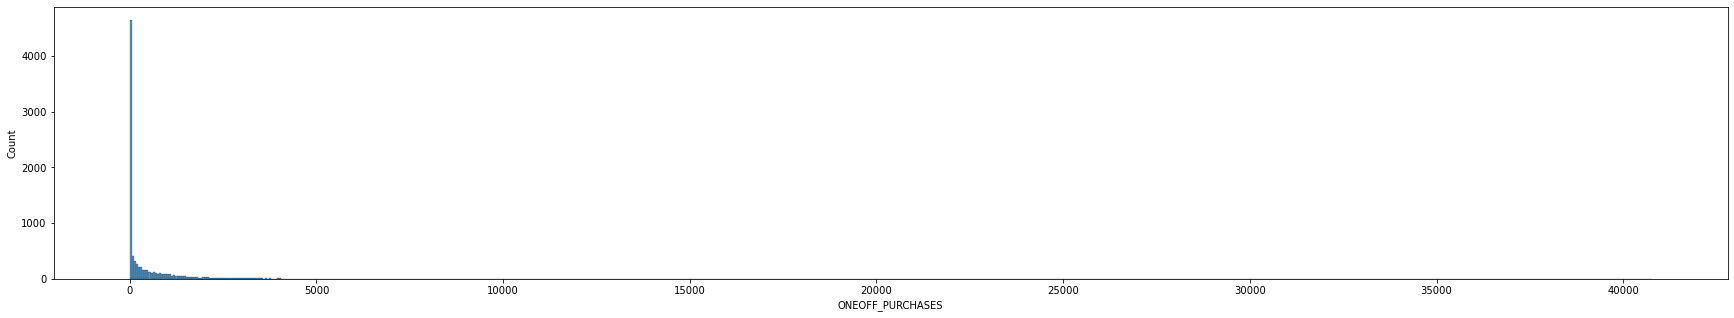

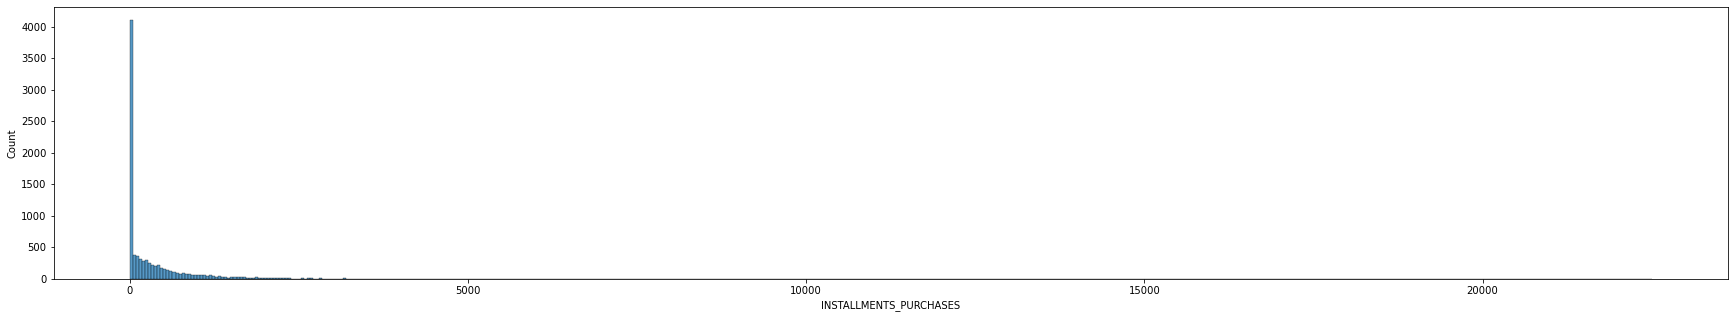

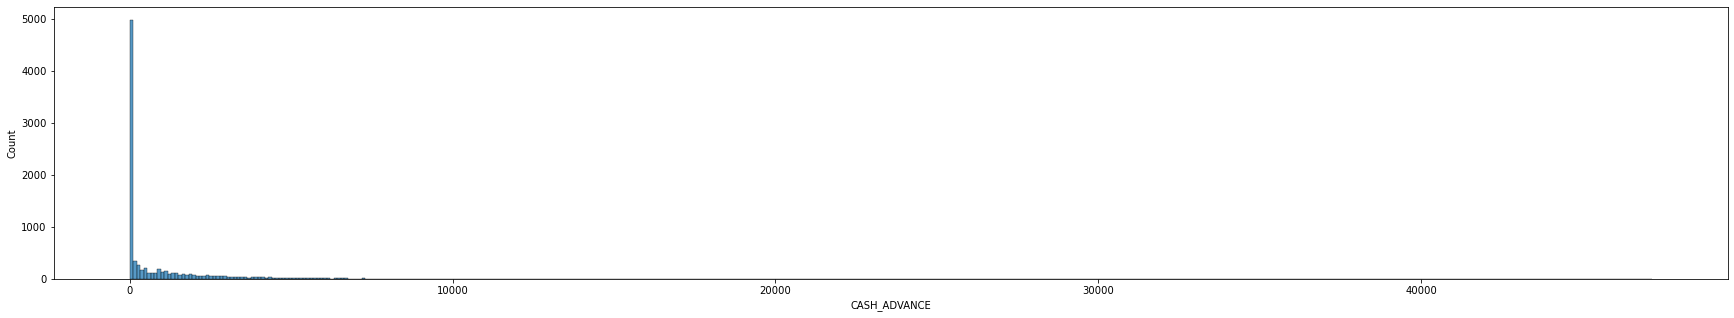

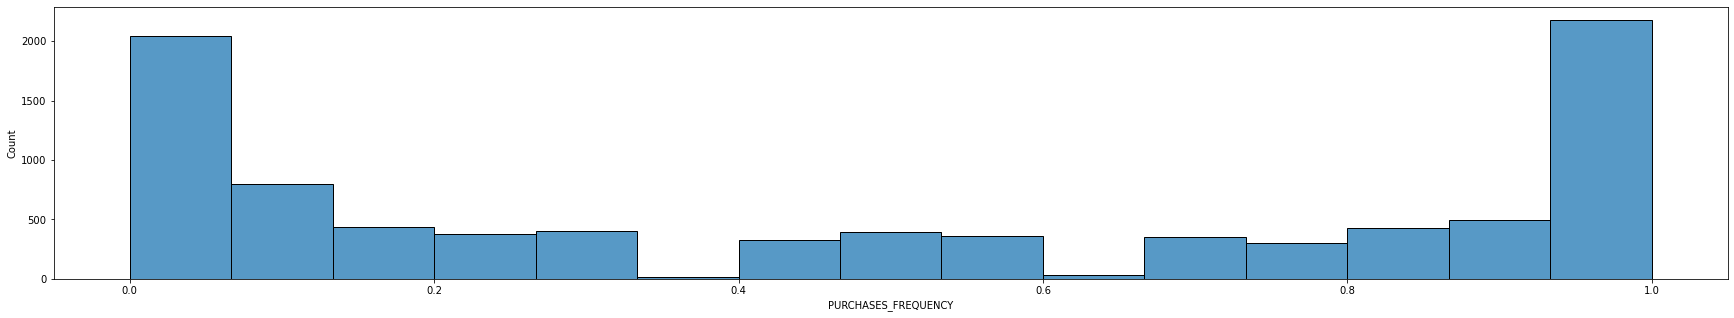

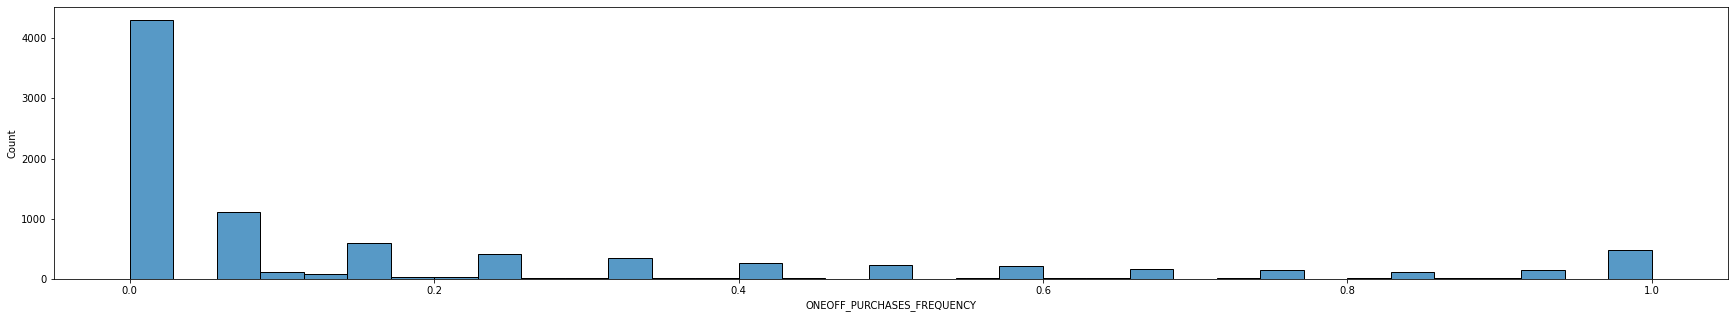

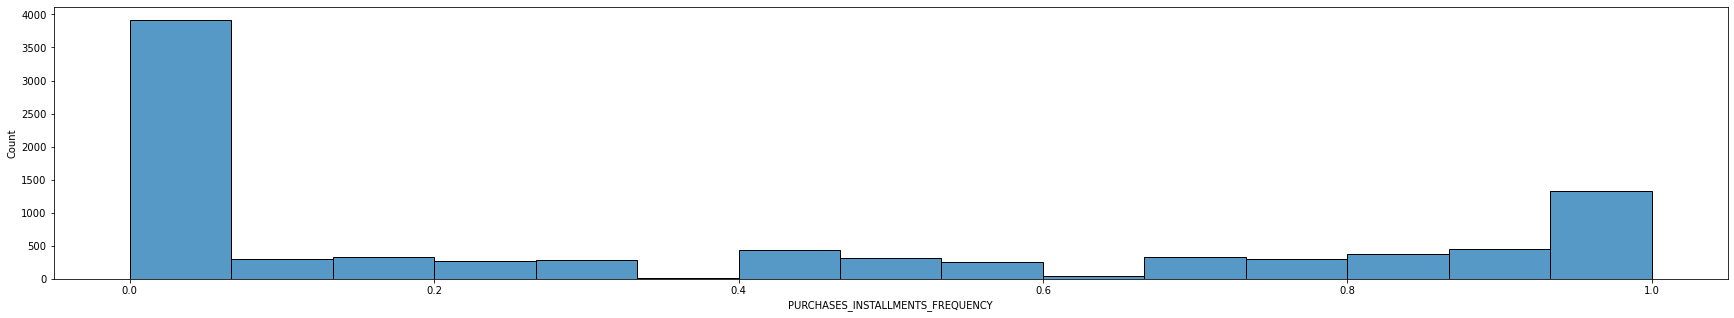

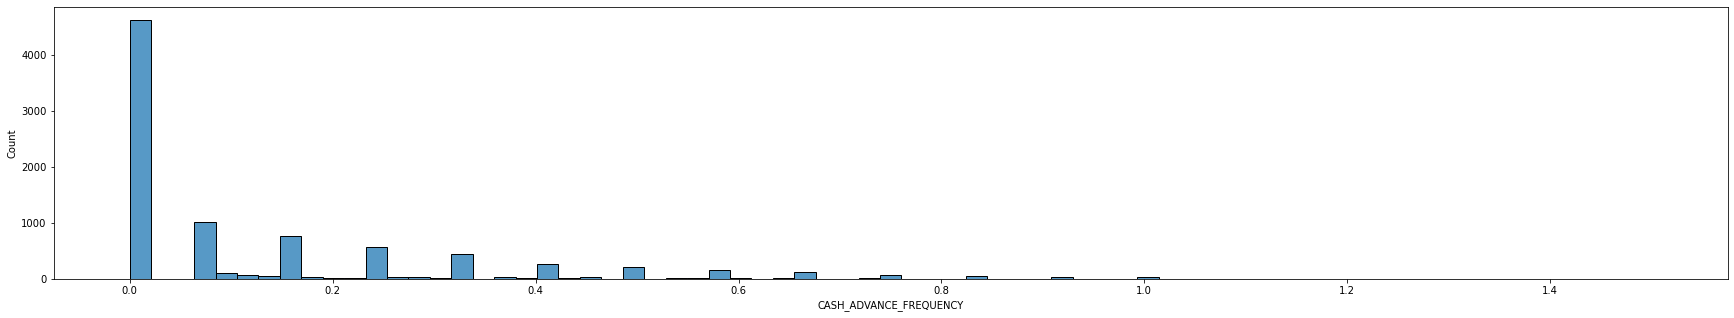

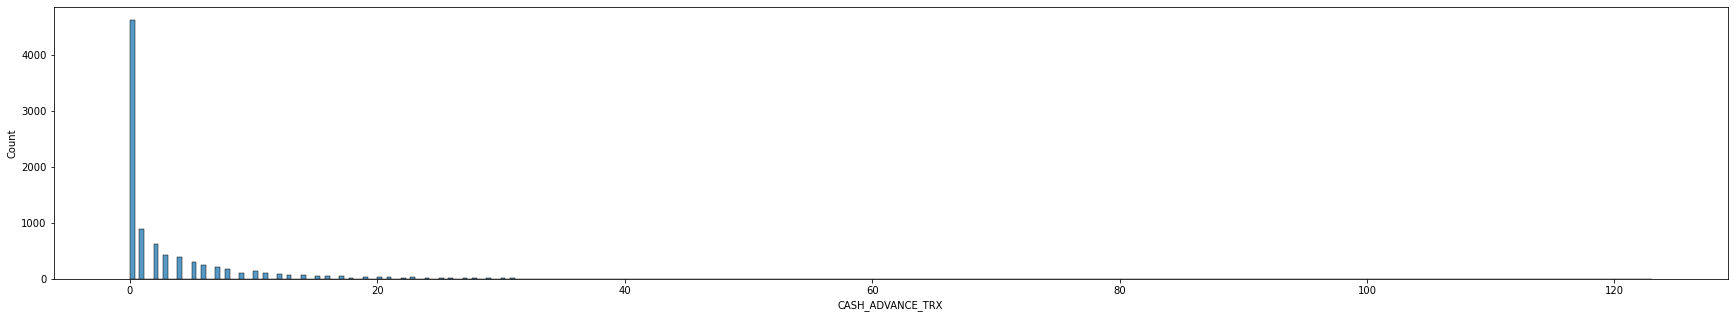

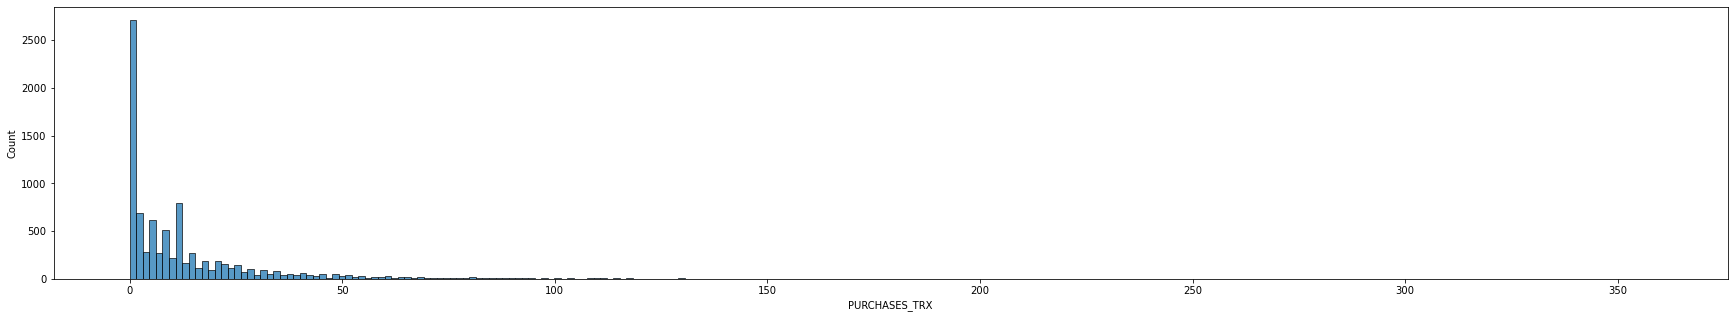

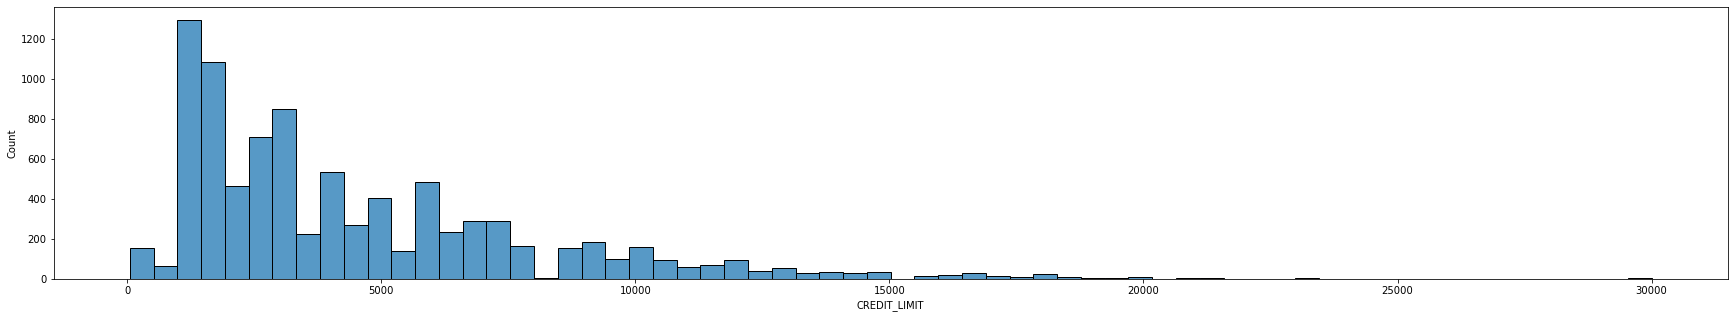

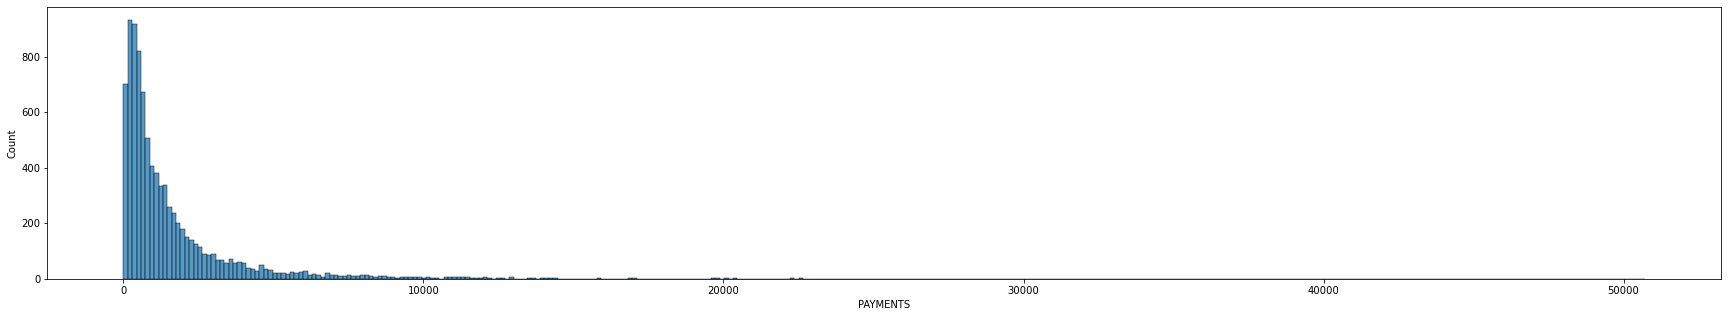

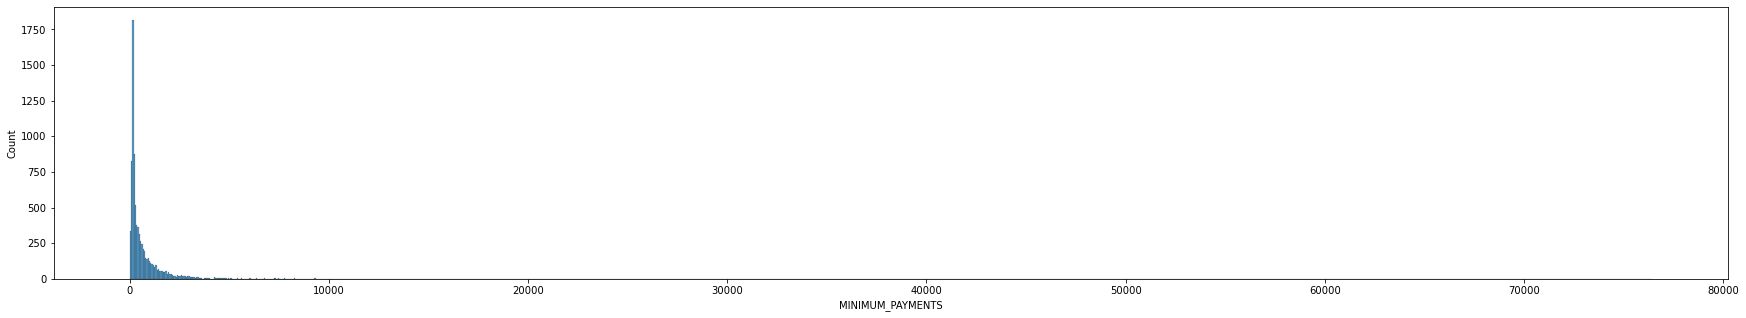

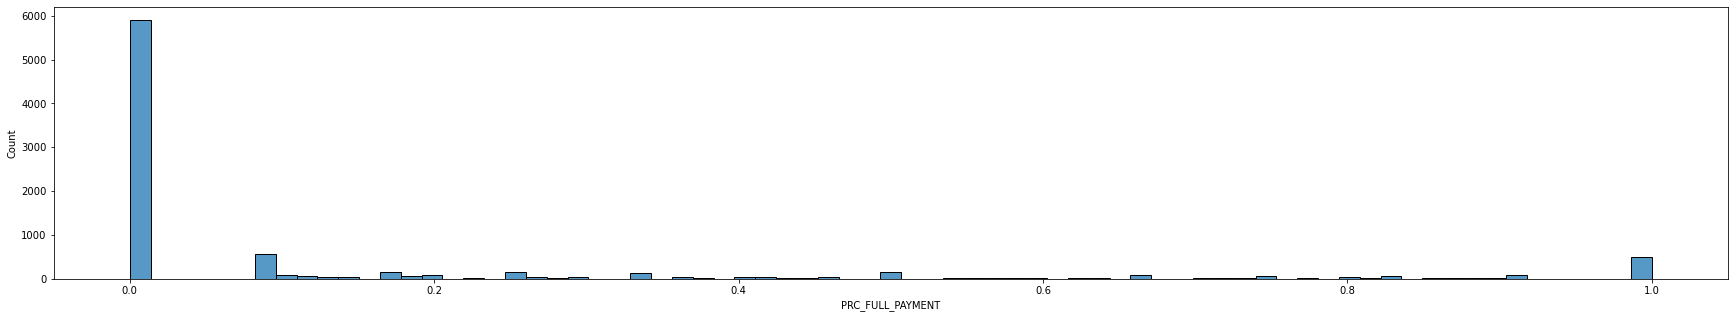

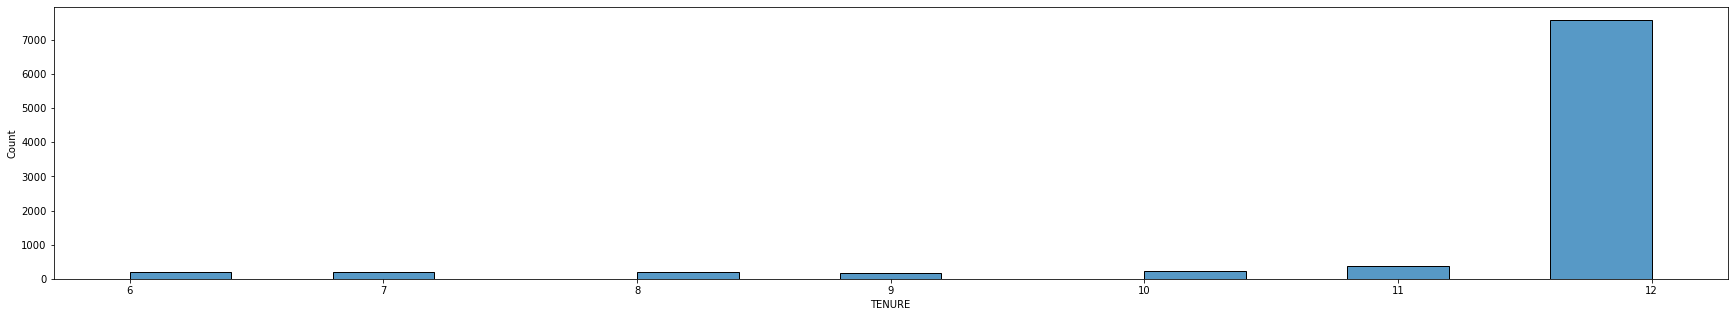

In [9]:
for column in df.columns:
    plt.figure(figsize = (30,5))
    sns.histplot(df[column])
    plt.show()

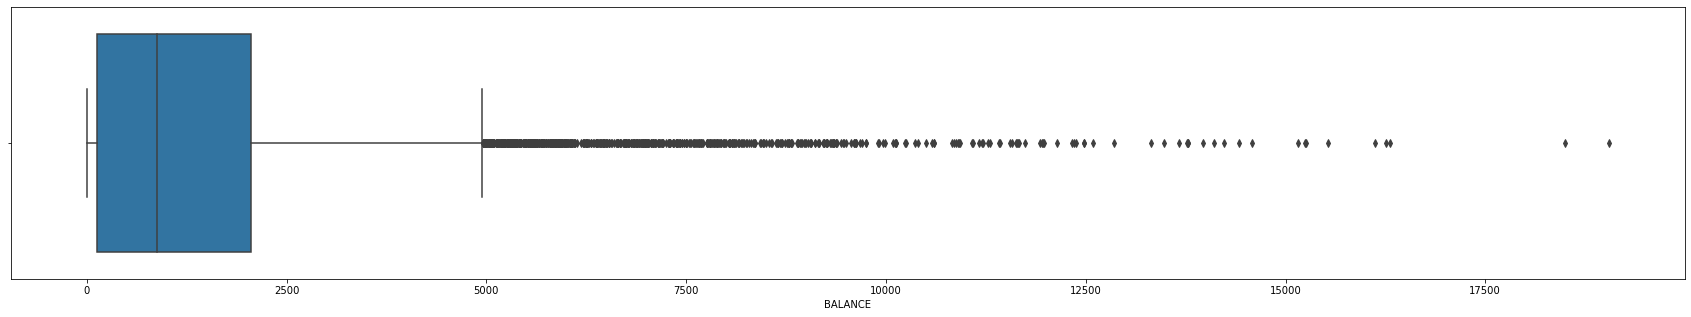

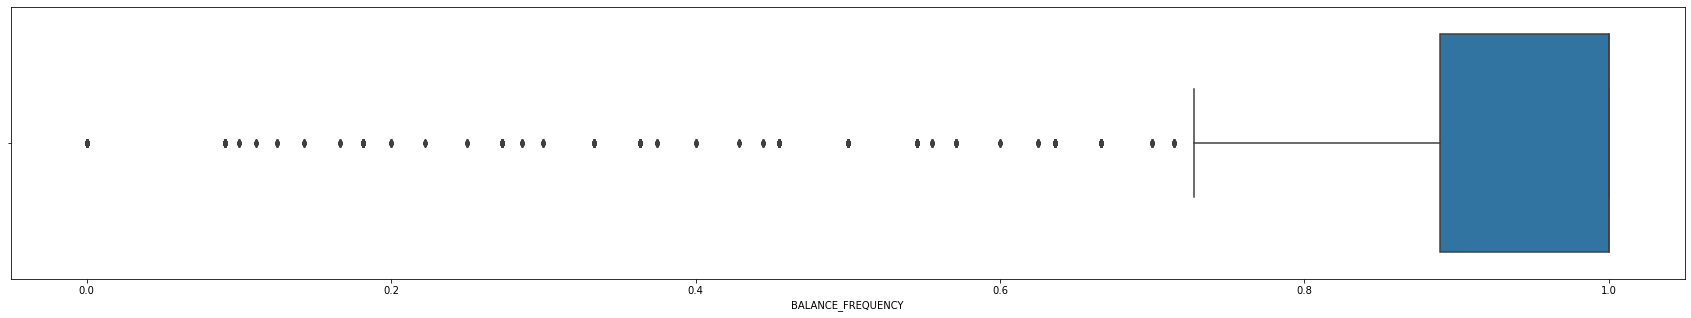

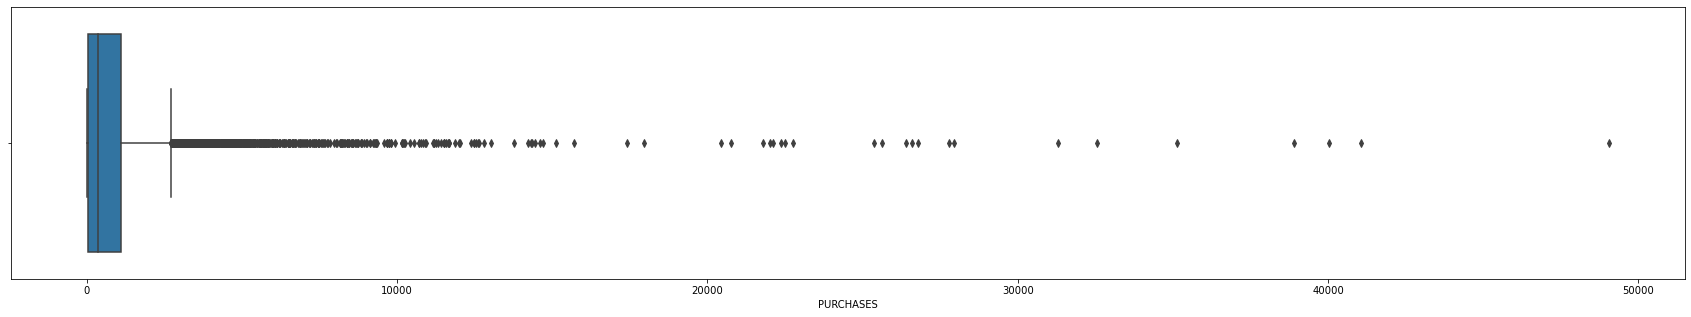

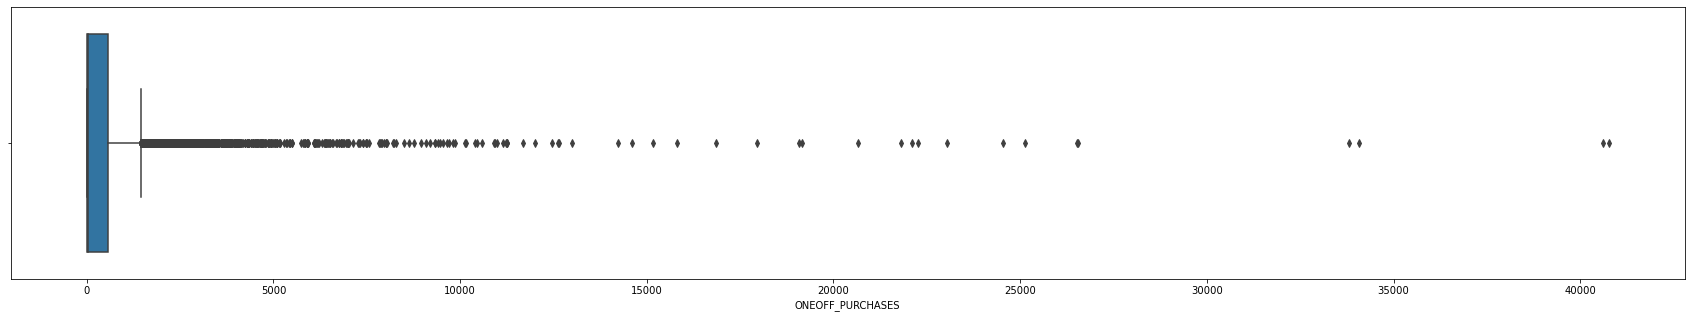

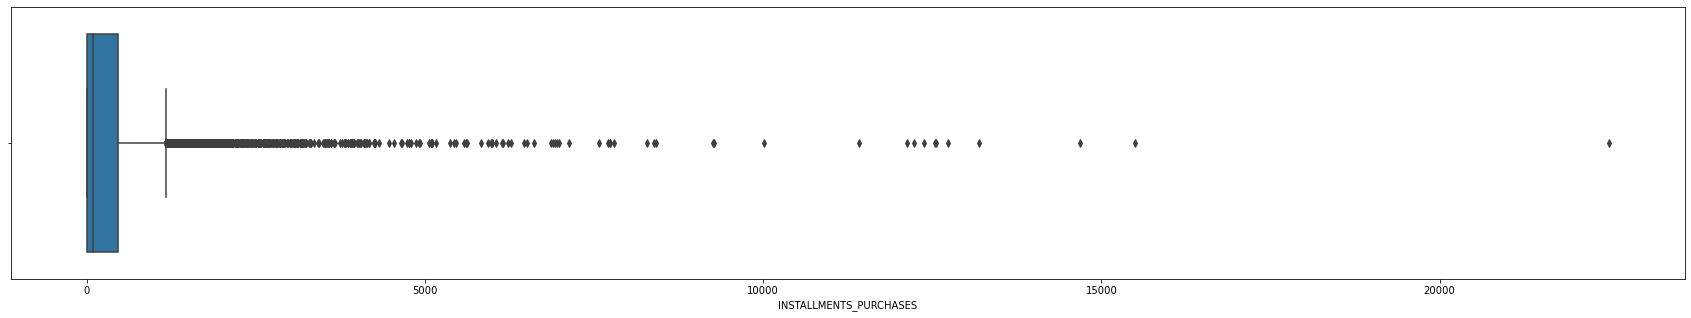

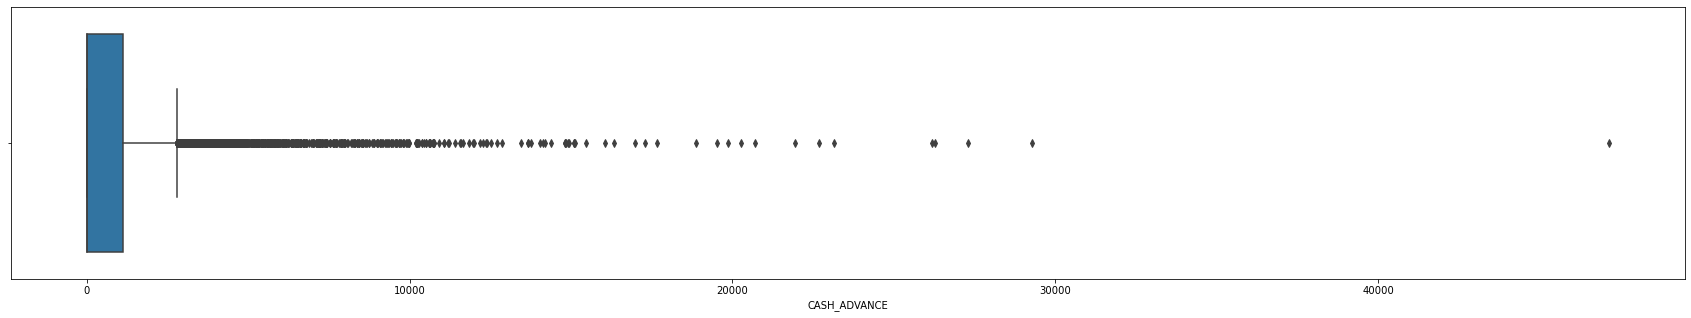

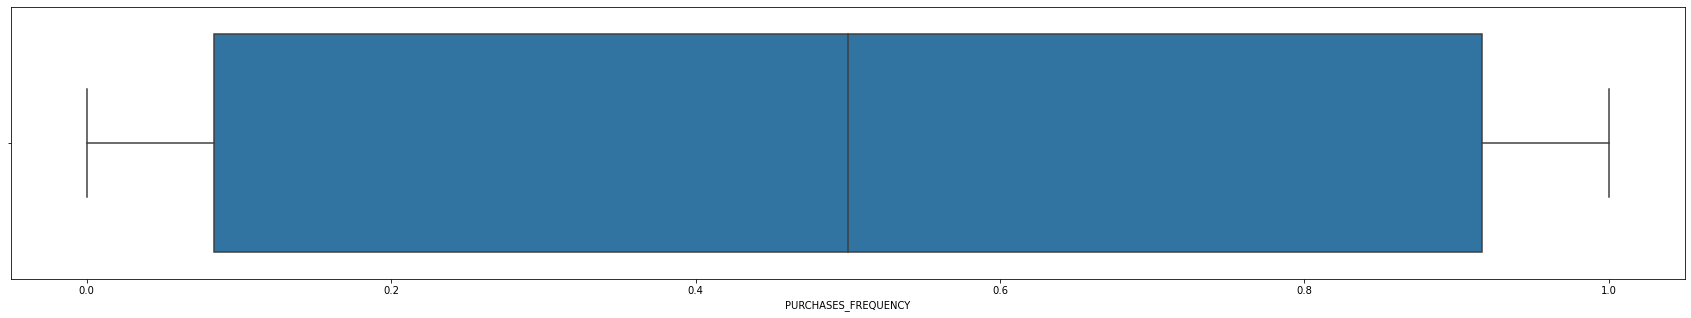

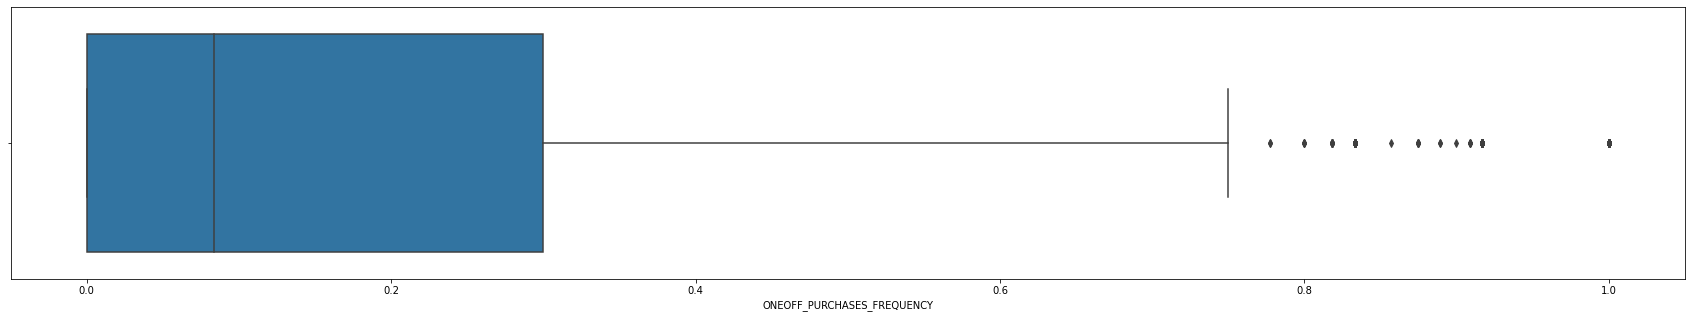

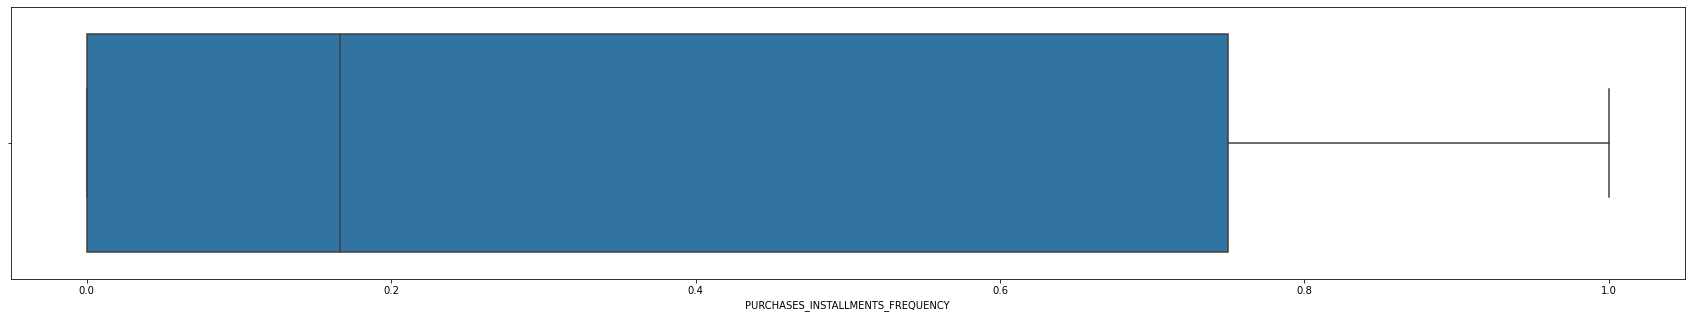

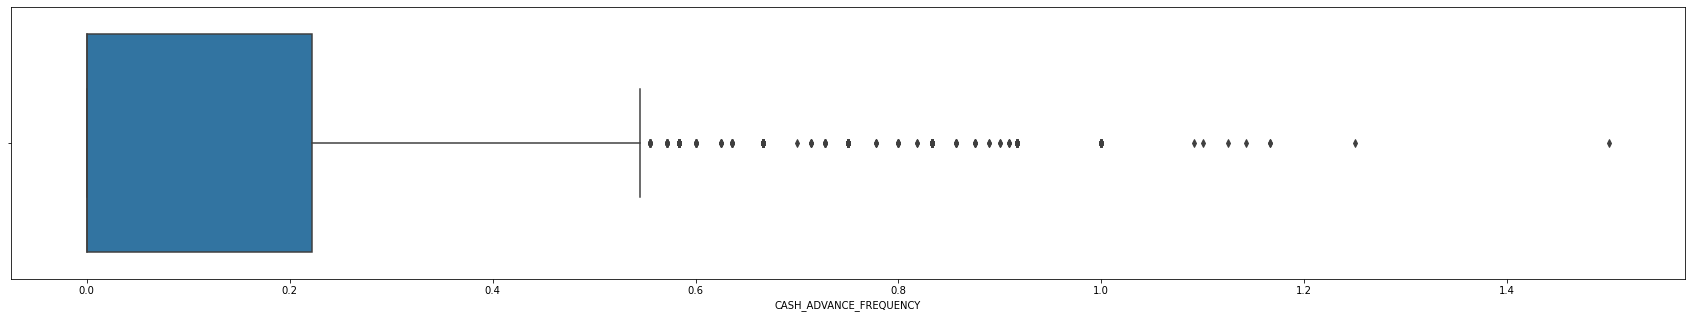

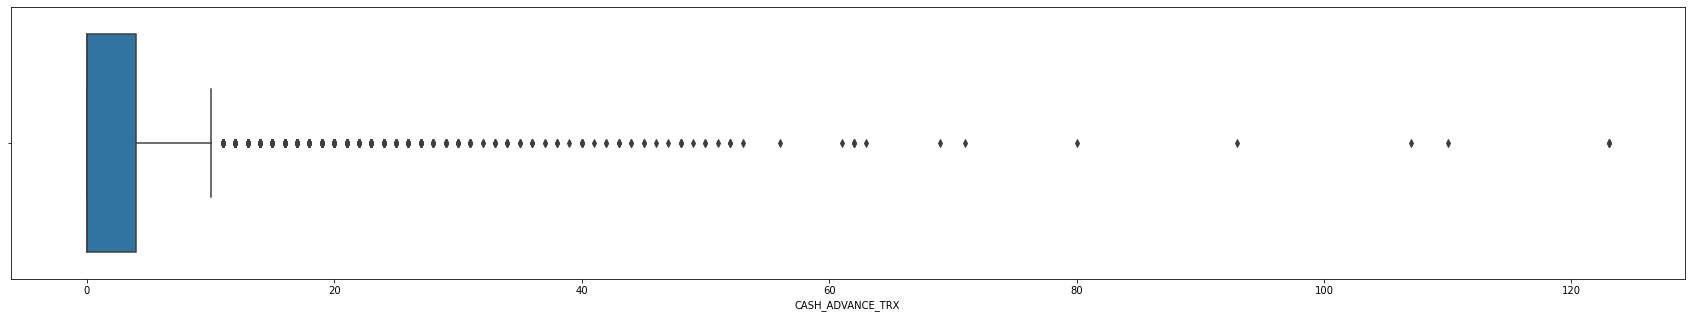

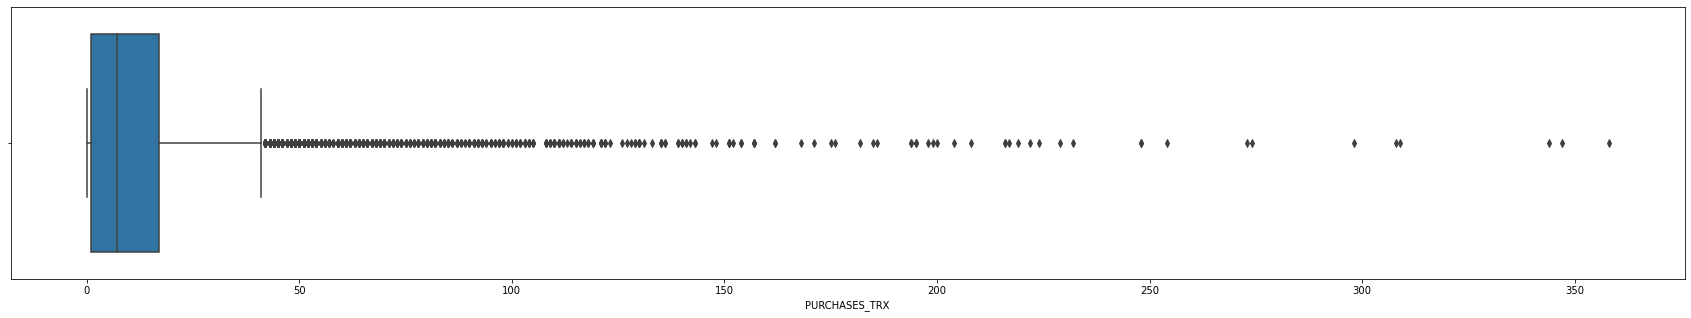

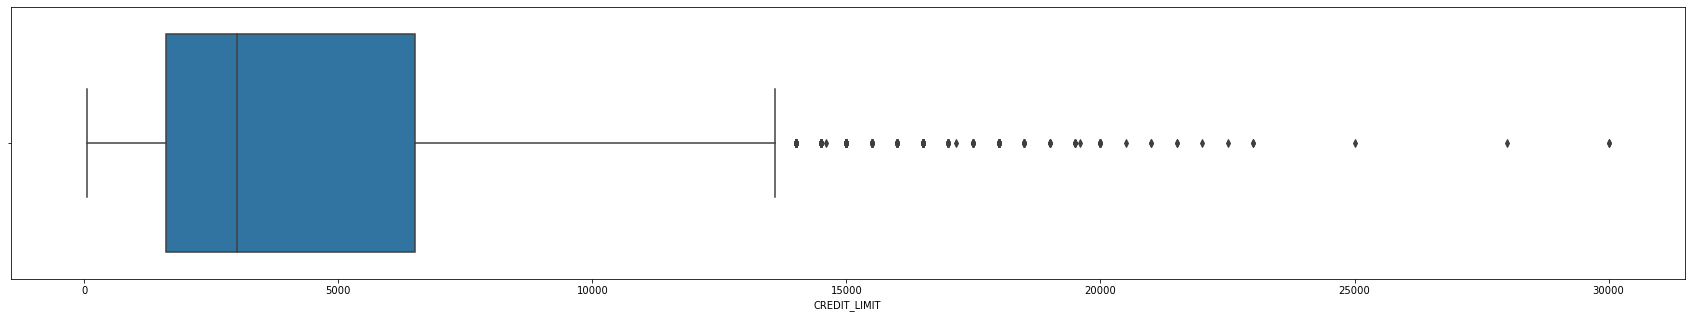

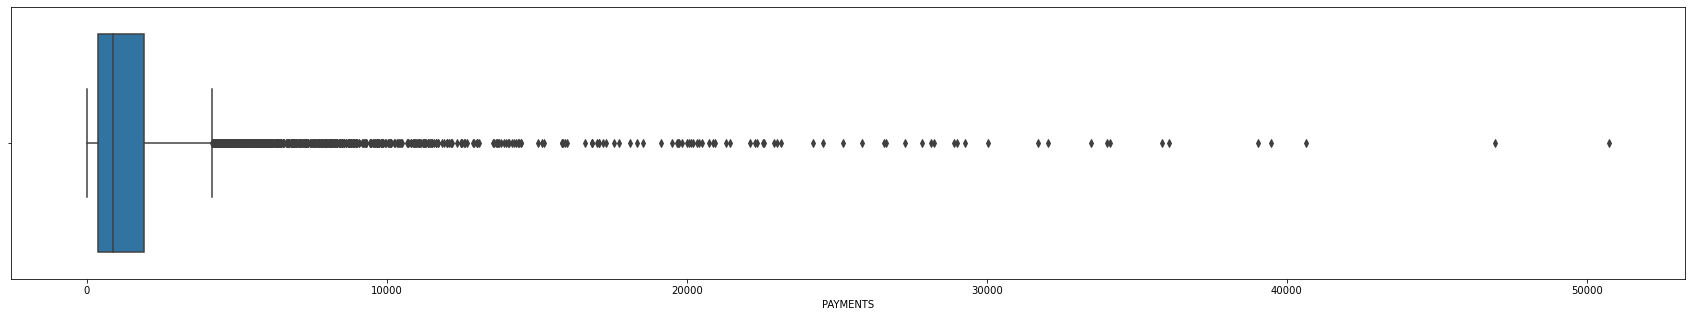

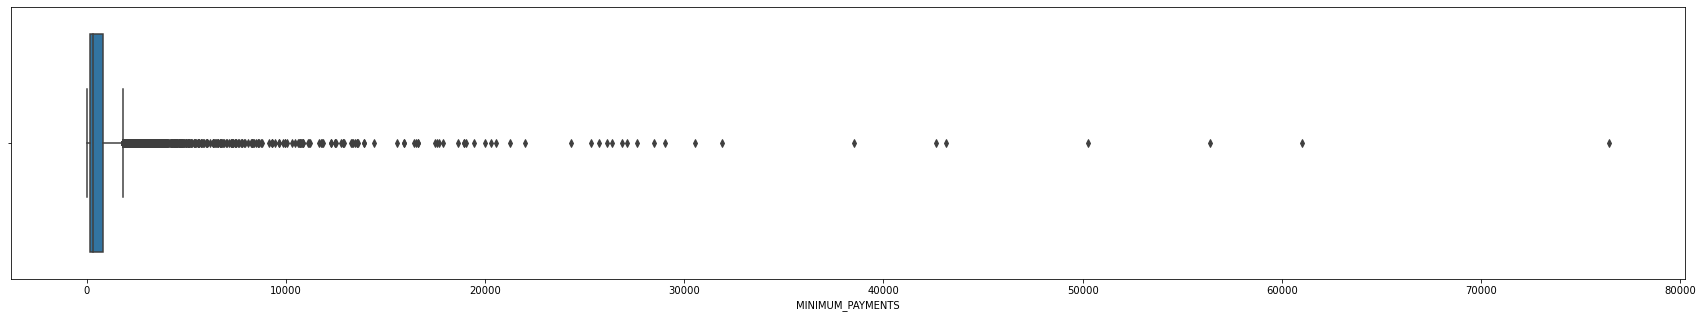

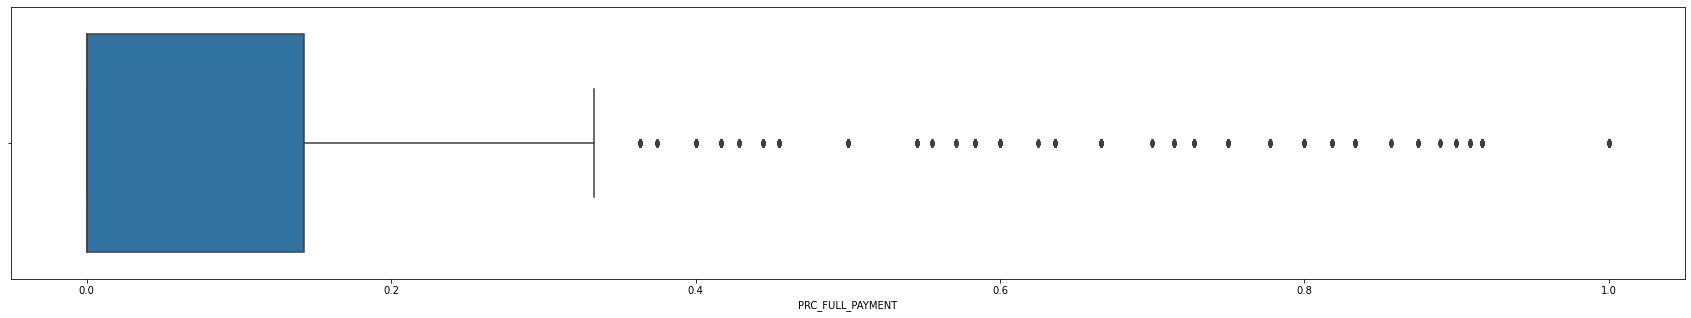

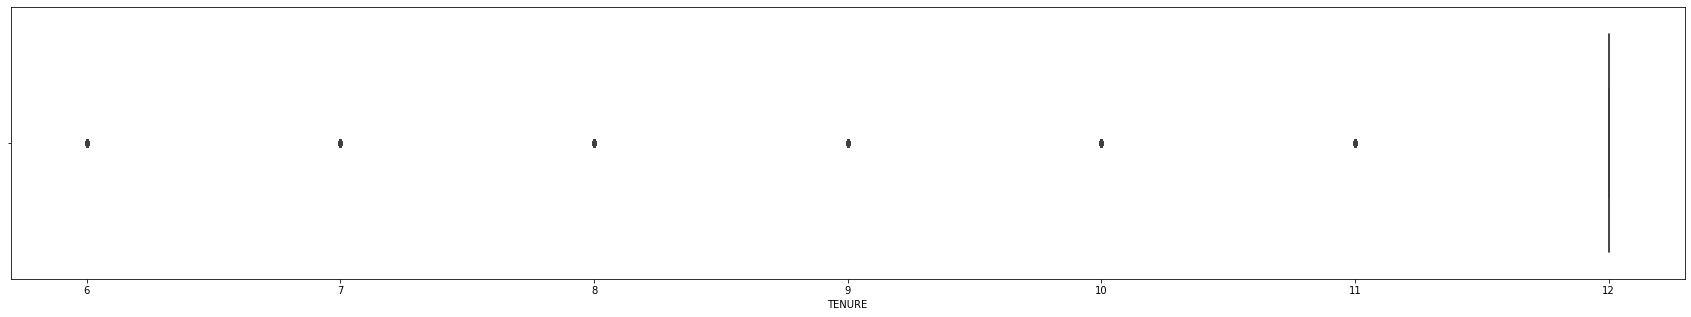

In [10]:
for column in df.columns:
    plt.figure(figsize = (30,5))
    sns.boxplot(df[column])
    plt.show()

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

X = df['MINIMUM_PAYMENTS'].values.reshape(-1,1)
X = imputer.fit_transform(X) 

df['MINIMUM_PAYMENTS_NEW'] = X

In [12]:
X2 = df['CREDIT_LIMIT'].values.reshape(-1,1)
X2 = imputer.fit_transform(X2) 

df['CREDIT_LIMIT_NEW'] = X2

In [13]:
df = df.drop(['CREDIT_LIMIT','MINIMUM_PAYMENTS'],axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  PAYMEN

In [14]:
df.isnull().sum().sum()

0

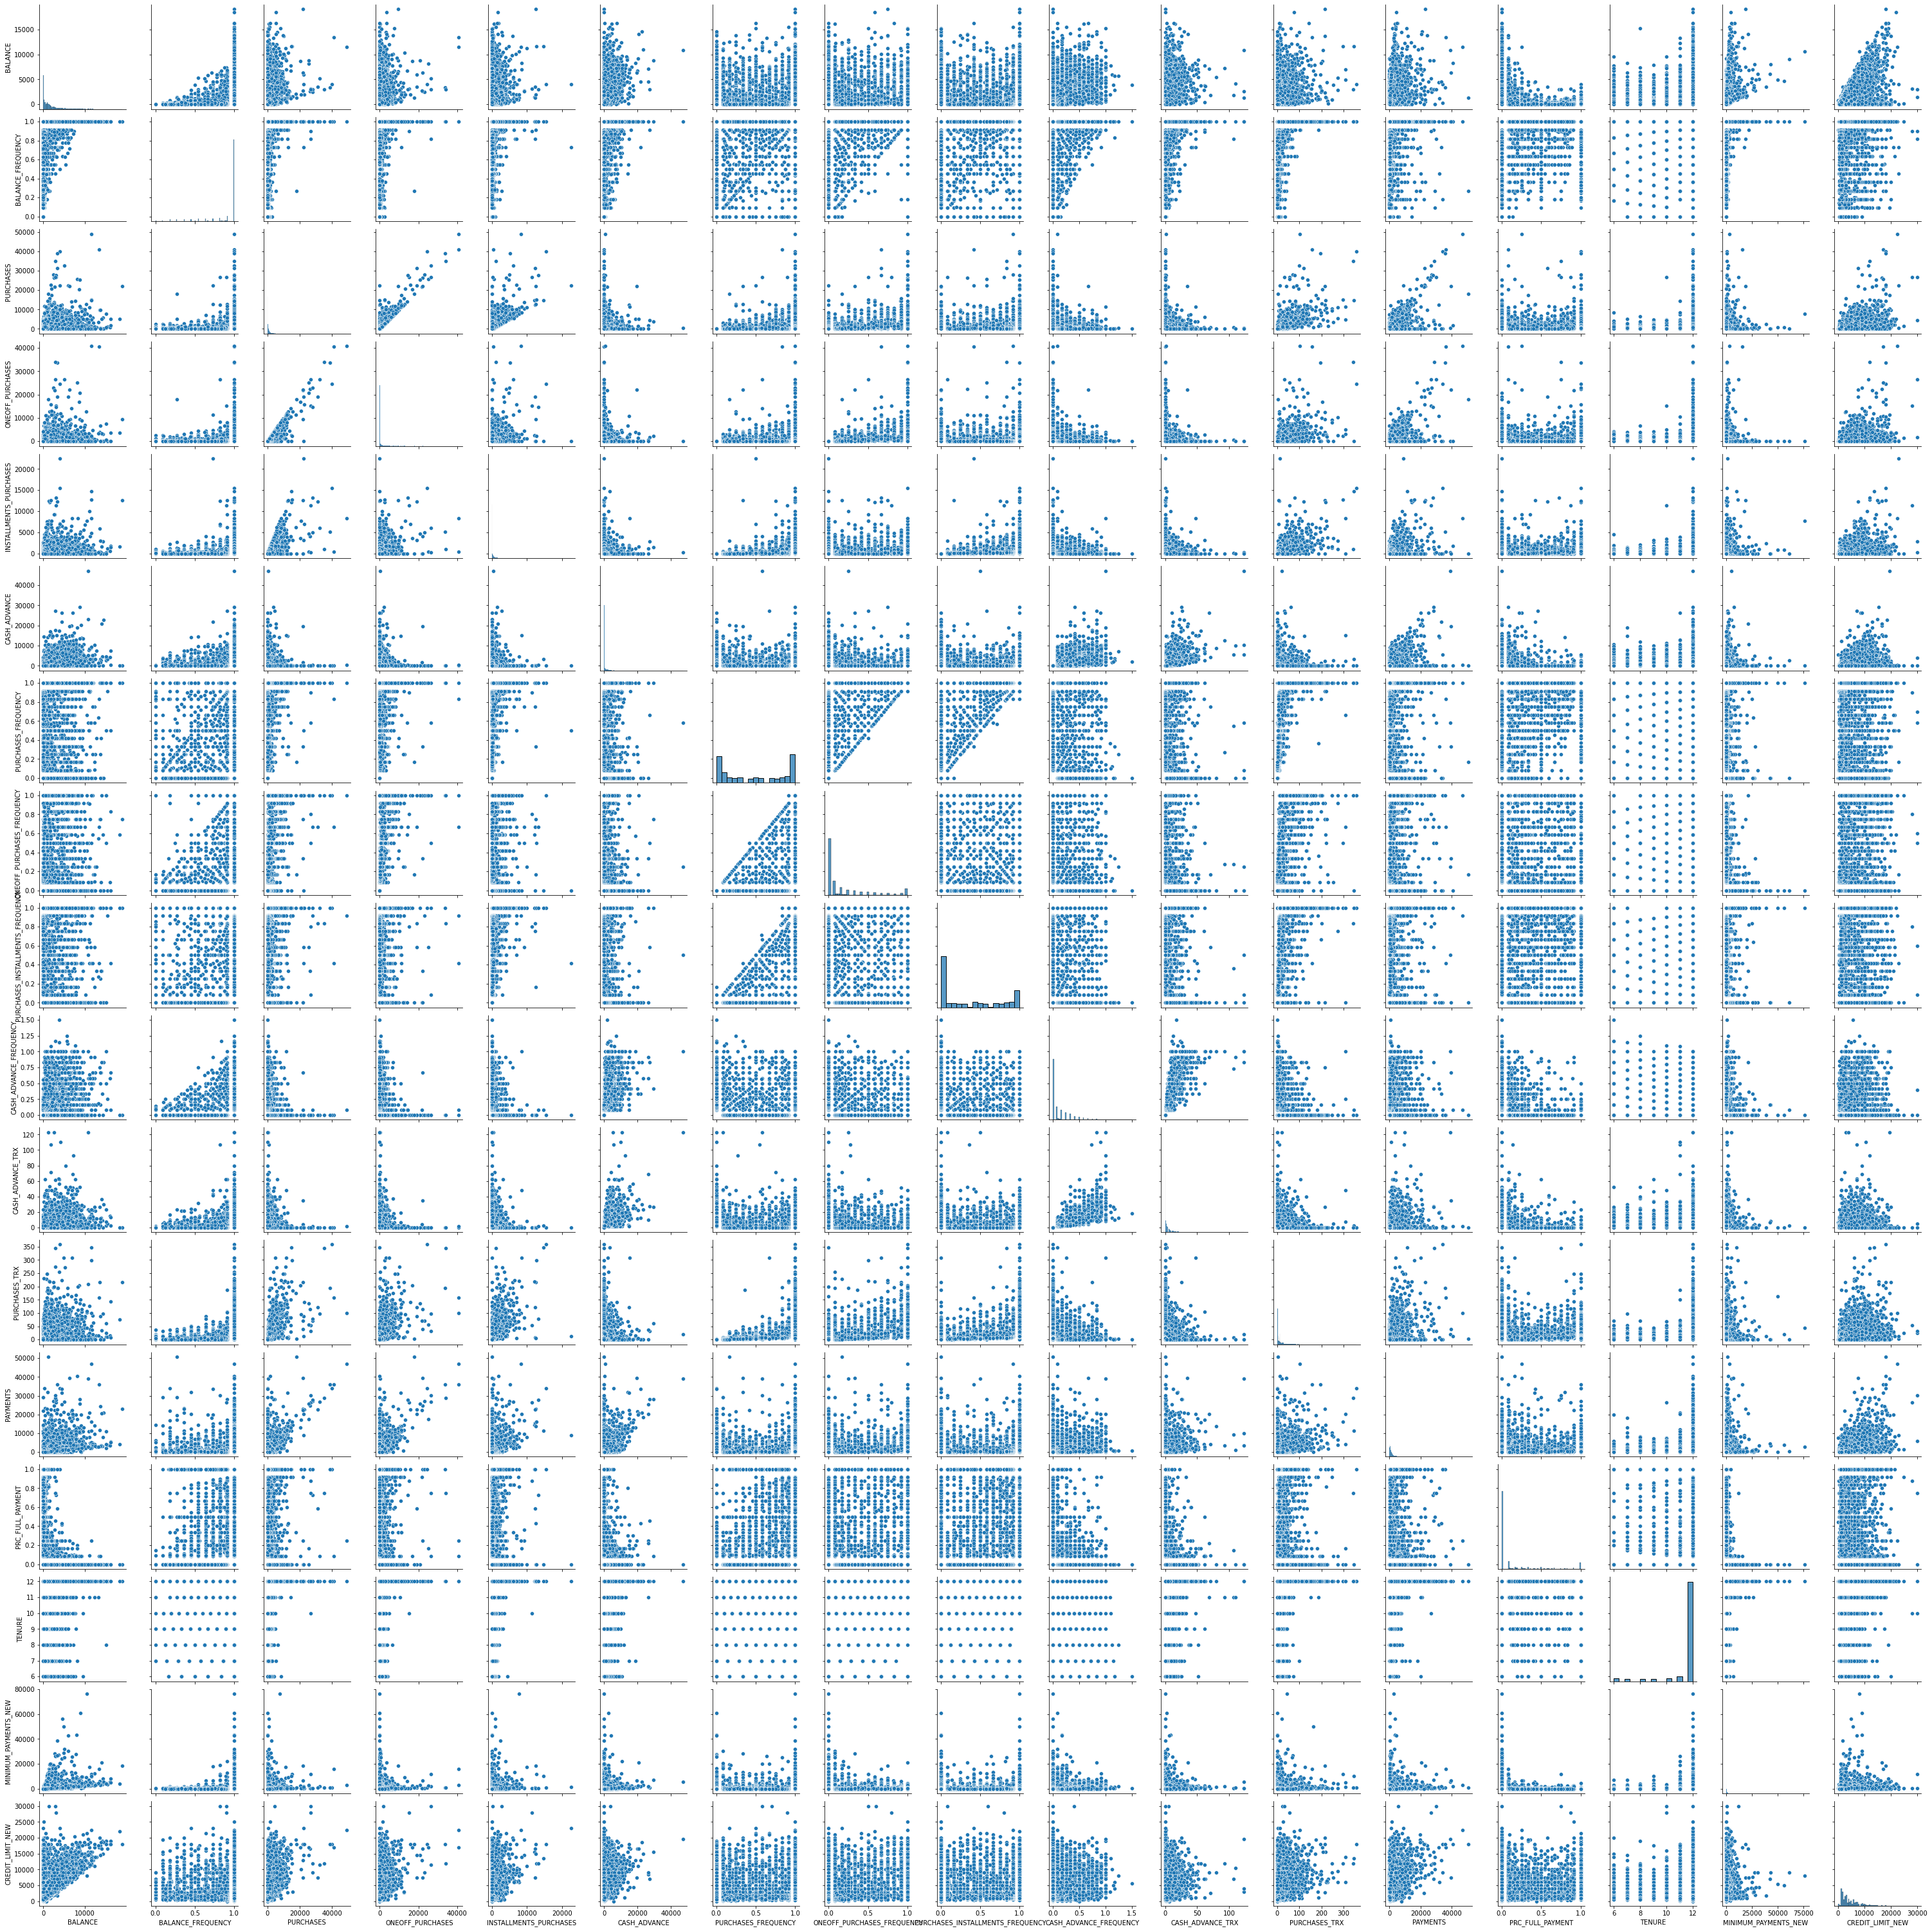

In [15]:
sns.pairplot(df)
plt.show()

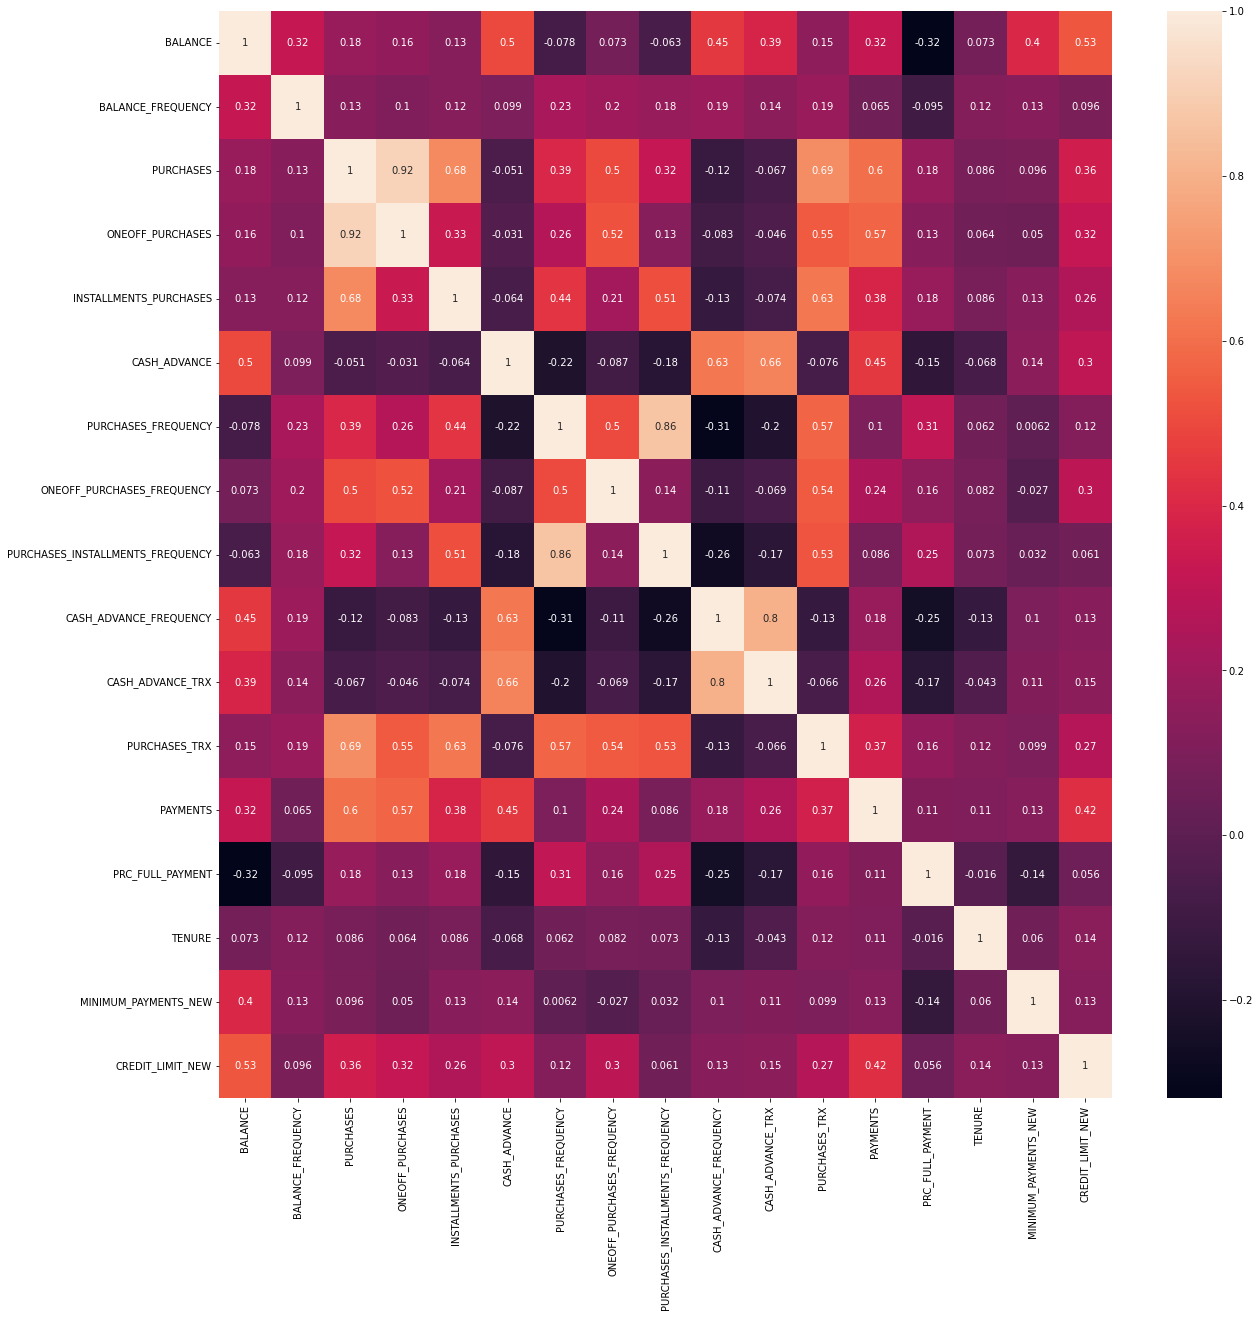

In [16]:
plt.figure(figsize=(20,20))
corr_df = df.corr()
sns.heatmap(corr_df,annot=True)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df,test_size=0.2,random_state=42)

In [18]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
train_df = mm.fit_transform(train_df)
test_df = mm.transform(test_df)

In [19]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
train_df = pt.fit_transform(train_df)
test_df = pt.transform(test_df)

In [20]:
from sklearn.cluster import KMeans

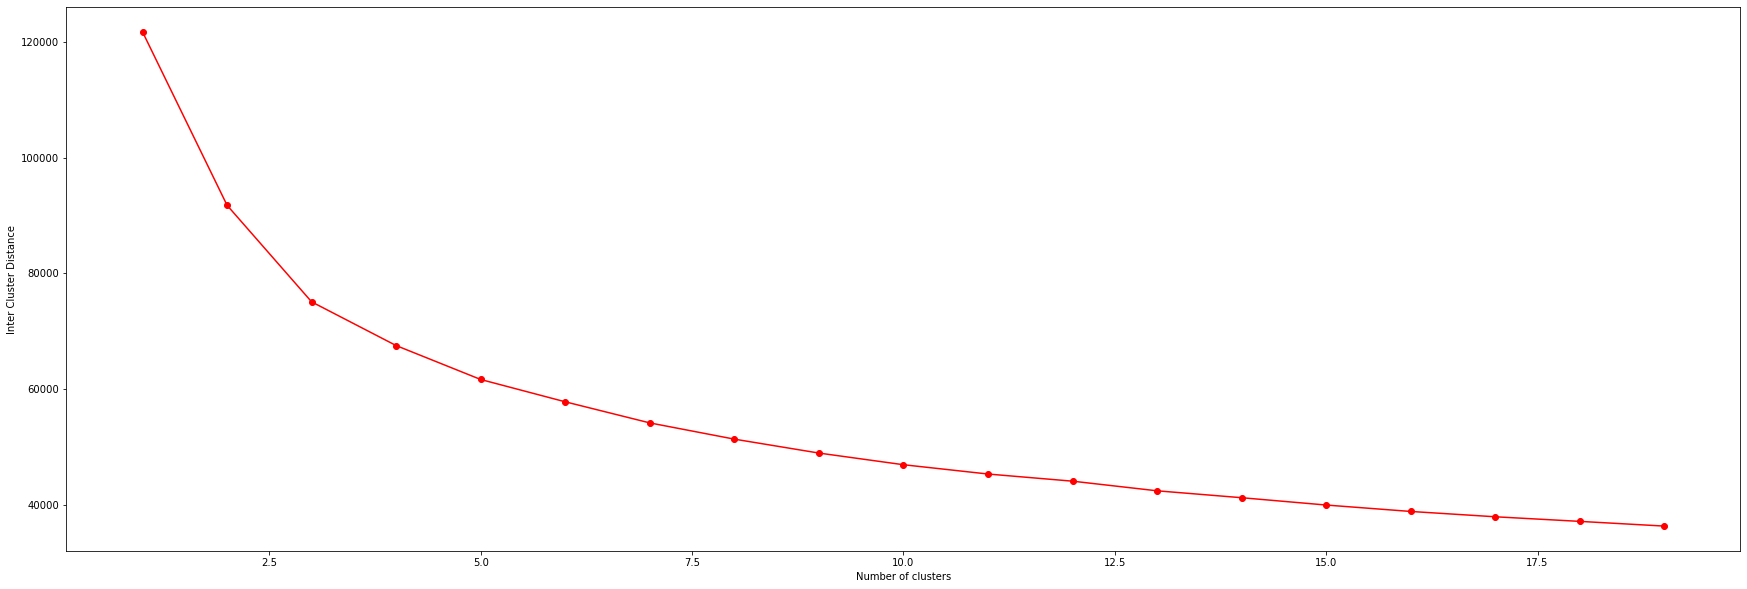

In [21]:
interclusterdistance = []

for clusters in range(1,20):
    km = KMeans(n_clusters = clusters,init ='k-means++', max_iter=300,random_state=42)
    km.fit(train_df)
    interclusterdistance.append(km.inertia_)
    
#plotting the values
plt.figure(figsize=(30,10))
plt.plot(range(1, 20), interclusterdistance, marker='o', color='r')
plt.xlabel('Number of clusters')
plt.ylabel('Inter Cluster Distance')
plt.show()

In [22]:
km = KMeans(n_clusters = 6,init ='k-means++', max_iter=300,random_state=42)
km.fit(train_df)
y_pred = km.predict(train_df)

In [23]:
cluster_df = pd.DataFrame(train_df,columns = df.columns)
cluster_df['clusters'] = y_pred
cluster_df.head(10)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.937132          -1.267216  -0.029433          0.338526   
1  1.291880           0.630684  -1.038959         -0.770843   
2 -0.465038           0.630684  -1.038959         -0.770843   
3 -1.148135          -1.698717   1.370433         -0.659492   
4  1.388866           0.630684  -0.912679         -0.576602   
5 -0.978519          -1.972925  -0.513848         -0.770843   
6 -1.132653           0.630684  -0.284999         -0.770843   
7  0.784516           0.630684   1.955706          2.101295   
8  0.270674           0.630684  -1.002768         -0.714616   
9 -0.669240          -1.065671   0.219068         -0.005898   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.240386     -0.759264             0.759911   
1               -0.875991     -0.442225            -1.277682   
2               -0.875991      1.956628            -1.277682   
3                1.955042     -0.759264             1.052468   
4               -0.875991      1.679374            -1.014267   
5                0.153759      0.846675             1.220853   
6                0.522080     -0.759264             1.220853   
7                1.192952     -0.759264             1.220853   
8               -0.875991     -0.759264            -1.014267   
9                0.714638     -0.759264             0.878811   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    1.311241                          0.943811   
1                   -0.899467                         -1.004129   
2                   -0.899467                         -1.004129   
3                   -0.084946                          1.183555   
4                   -0.084946                         -1.004129   
5                   -0.899467                          1.377708   
6                   -0.899467                          1.235844   
7                    1.672441                          0.458988   
8                   -0.084946                         -1.004129   
9                    1.627952                          1.070284   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  PAYMENTS  \
0               -0.879684         -0.811487       0.511013 -1.202855   
1                0.119472         -0.225140      -1.112948 -0.282814   
2                1.843015          1.783117      -1.112948  1.755467   
3               -0.879684         -0.811487       0.345413  0.663031   
4                1.124381          1.300071      -0.952862 -0.204360   
5                0.119472          0.236861       0.345413  0.173675   
6               -0.879684         -0.811487      -0.042362 -0.973483   
7               -0.879684         -0.811487       1.077363  1.435215   
8               -0.879684         -0.811487      -0.952862 -0.991293   
9               -0.879684         -0.811487       1.496932  0.593315   

   PRC_FULL_PAYMENT    TENURE  MINIMUM_PAYMENTS_NEW  CREDIT_LIMIT_NEW  \
0         -0.682927 -2.523257             -0.904943         -0.474651   
1         -0.682927  0.420804              1.573059          0.874702   
2          1.851019  0.420804             -0.374950         -1.328991   
3         -0.682927  0.420804             -1.276909         -0.730514   
4         -0.682927  0.420804              1.252173          0.756250   
5         -0.682927  0.420804             -0.971059         -1.199044   
6          1.770979 -2.538000             -0.908083         -1.328991   
7         -0.682927  0.420804              0.122970          0.982936   
8         -0.682927  0.420804             -0.054464         -1.014119   
9          0.457313  0.420804             -0.591884          0.155435   

   clusters  
0         0  
1         1  
2         1  
3         2  
4         1  
5         2  
6         2  
7         4  
8         5  
9         4

In [24]:
cluster_df['clusters'].value_counts()

2    1617
1    1510
5    1392
4    1002
0     912
3     727
Name: clusters, dtype: int64

In [25]:
X = cluster_df[['BALANCE','PURCHASES']].to_numpy()

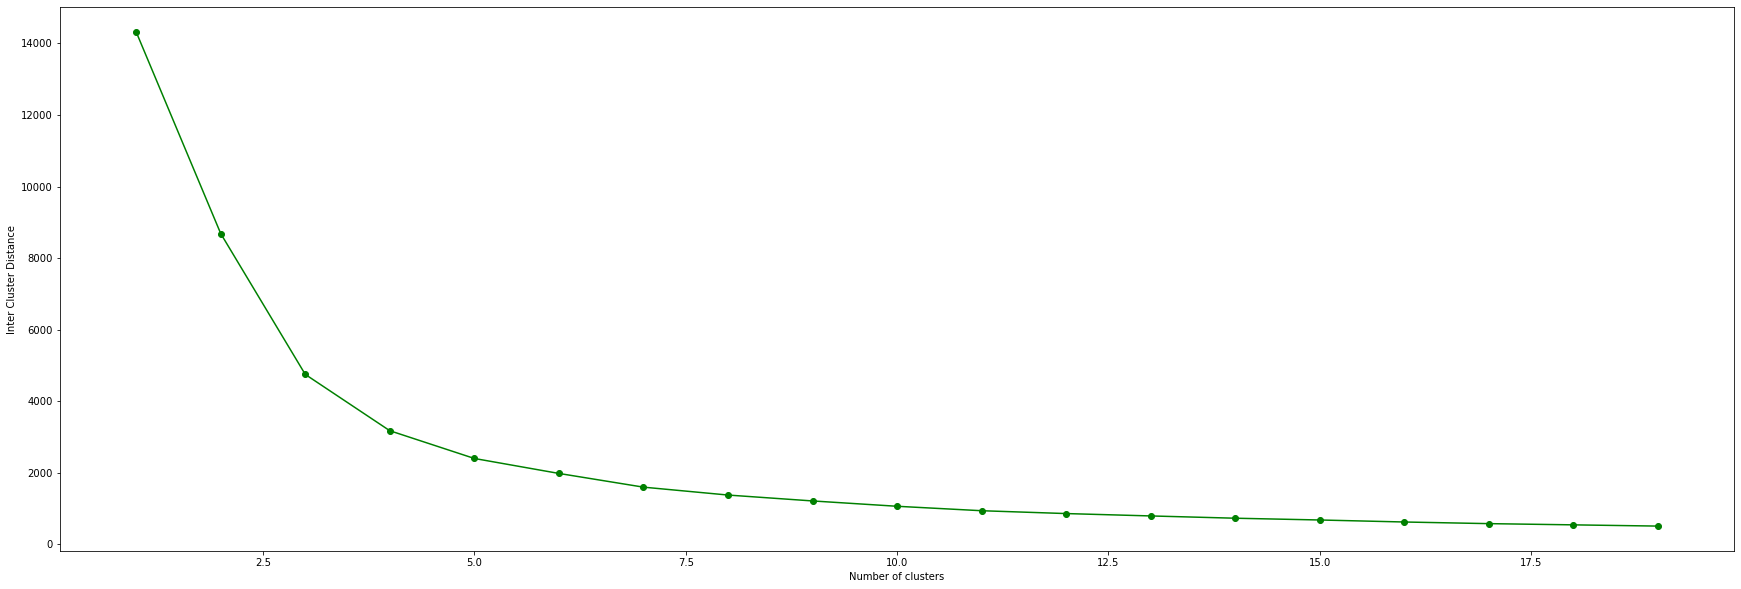

In [26]:
interclusterdistance = []

for clusters in range(1,20):
    km = KMeans(n_clusters = clusters,init ='k-means++', max_iter=300,random_state=42)
    km.fit(X)
    interclusterdistance.append(km.inertia_)
    
#plotting the values
plt.figure(figsize=(30,10))
plt.plot(range(1, 20), interclusterdistance, marker='o', color='g')
plt.xlabel('Number of clusters')
plt.ylabel('Inter Cluster Distance')
plt.show()

In [27]:
km = KMeans(n_clusters = 4,init ='k-means++', max_iter=300,random_state=42)
km.fit(X)
y_balance_pred = km.predict(X)

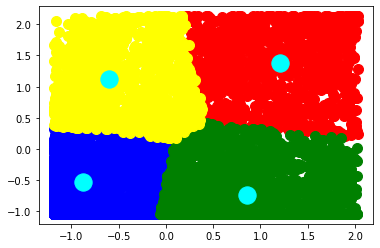

In [28]:
plt.scatter(X[y_balance_pred==0, 0], X[y_balance_pred==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_balance_pred==1, 0], X[y_balance_pred==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_balance_pred==2, 0], X[y_balance_pred==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_balance_pred==3, 0], X[y_balance_pred==3, 1], s=100, c='yellow', label ='Cluster 4')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300, c='cyan', label = 'Centroids')
plt.show()

In [29]:
from sklearn.cluster import DBSCAN

In [30]:
dbscan = DBSCAN(eps=2,min_samples=6)
dbscan.fit(train_df)
y_dbscan_pred = dbscan.labels_
y_dbscan_pred

array([ 1,  0,  0, ...,  0,  0, -1], dtype=int64)

In [31]:
dbscan_df = pd.DataFrame(train_df,columns = df.columns)
dbscan_df['clusters'] = y_dbscan_pred
dbscan_df.head(10)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.937132          -1.267216  -0.029433          0.338526   
1  1.291880           0.630684  -1.038959         -0.770843   
2 -0.465038           0.630684  -1.038959         -0.770843   
3 -1.148135          -1.698717   1.370433         -0.659492   
4  1.388866           0.630684  -0.912679         -0.576602   
5 -0.978519          -1.972925  -0.513848         -0.770843   
6 -1.132653           0.630684  -0.284999         -0.770843   
7  0.784516           0.630684   1.955706          2.101295   
8  0.270674           0.630684  -1.002768         -0.714616   
9 -0.669240          -1.065671   0.219068         -0.005898   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.240386     -0.759264             0.759911   
1               -0.875991     -0.442225            -1.277682   
2               -0.875991      1.956628            -1.277682   
3                1.955042     -0.759264             1.052468   
4               -0.875991      1.679374            -1.014267   
5                0.153759      0.846675             1.220853   
6                0.522080     -0.759264             1.220853   
7                1.192952     -0.759264             1.220853   
8               -0.875991     -0.759264            -1.014267   
9                0.714638     -0.759264             0.878811   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    1.311241                          0.943811   
1                   -0.899467                         -1.004129   
2                   -0.899467                         -1.004129   
3                   -0.084946                          1.183555   
4                   -0.084946                         -1.004129   
5                   -0.899467                          1.377708   
6                   -0.899467                          1.235844   
7                    1.672441                          0.458988   
8                   -0.084946                         -1.004129   
9                    1.627952                          1.070284   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  PAYMENTS  \
0               -0.879684         -0.811487       0.511013 -1.202855   
1                0.119472         -0.225140      -1.112948 -0.282814   
2                1.843015          1.783117      -1.112948  1.755467   
3               -0.879684         -0.811487       0.345413  0.663031   
4                1.124381          1.300071      -0.952862 -0.204360   
5                0.119472          0.236861       0.345413  0.173675   
6               -0.879684         -0.811487      -0.042362 -0.973483   
7               -0.879684         -0.811487       1.077363  1.435215   
8               -0.879684         -0.811487      -0.952862 -0.991293   
9               -0.879684         -0.811487       1.496932  0.593315   

   PRC_FULL_PAYMENT    TENURE  MINIMUM_PAYMENTS_NEW  CREDIT_LIMIT_NEW  \
0         -0.682927 -2.523257             -0.904943         -0.474651   
1         -0.682927  0.420804              1.573059          0.874702   
2          1.851019  0.420804             -0.374950         -1.328991   
3         -0.682927  0.420804             -1.276909         -0.730514   
4         -0.682927  0.420804              1.252173          0.756250   
5         -0.682927  0.420804             -0.971059         -1.199044   
6          1.770979 -2.538000             -0.908083         -1.328991   
7         -0.682927  0.420804              0.122970          0.982936   
8         -0.682927  0.420804             -0.054464         -1.014119   
9          0.457313  0.420804             -0.591884          0.155435   

   clusters  
0         1  
1         0  
2         0  
3         0  
4         0  
5         0  
6         1  
7         0  
8         0  
9         0

In [32]:
dbscan_df['clusters'].value_counts()

 0    5904
 1     876
-1     361
 2       8
 4       6
 3       5
Name: clusters, dtype: int64

In [33]:
X = dbscan_df[['BALANCE','PURCHASES']].to_numpy()

In [34]:
dbscan = DBSCAN(eps=0.075,min_samples=2)
dbscan.fit(X)
y_dbscan_pred = dbscan.labels_
y_dbscan_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
dbscan_df['clusters'] = y_dbscan_pred
dbscan_df['clusters'].value_counts()

 0     7031
-1       24
 12      12
 5        9
 20       7
 13       7
 7        6
 9        6
 17       6
 2        5
 14       4
 15       4
 4        4
 23       3
 22       3
 19       3
 25       3
 1        3
 8        3
 6        3
 16       2
 18       2
 11       2
 10       2
 21       2
 24       2
 3        2
Name: clusters, dtype: int64

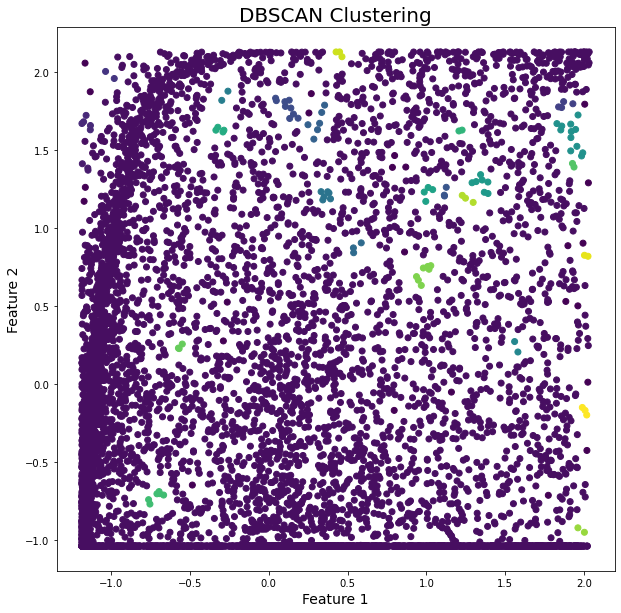

In [36]:
plt.figure(figsize=(10,10))
plt.scatter(dbscan_df['BALANCE'],dbscan_df['PURCHASES'],c=dbscan_df['clusters'])
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [37]:
!pip install minisom

In [38]:
from minisom import MiniSom

In [39]:
som = MiniSom(x = 20,y = 20, input_len = 17, sigma=0.25) 

In [40]:
som.train_random(train_df, 10000) 

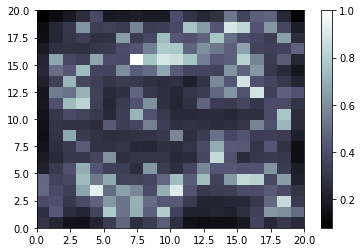

In [41]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(train_df):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [42]:
df = pd.read_csv("CC GENERAL.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [43]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [45]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [46]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace = True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace = True)

In [47]:
df['CUST_ID'].value_counts().unique()

array([1], dtype=int64)

In [48]:
df.drop(columns=['CUST_ID'],inplace = True)

In [49]:
df['TENURE'].unique()

array([12,  8, 11,  9, 10,  7,  6], dtype=int64)

In [50]:
X = df.iloc[:,:].values

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


In [52]:
from sklearn.cluster import KMeans
kmeans = KMeans(random_state=42)

distortion


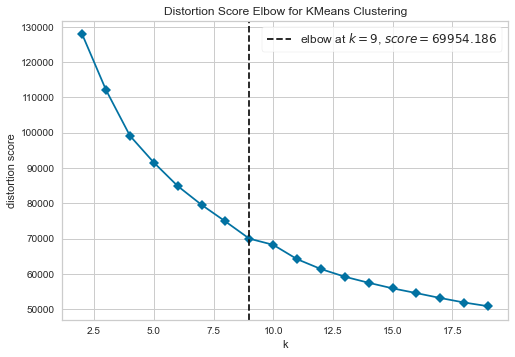

silhouette


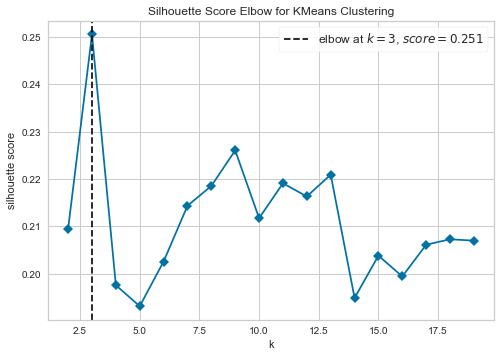

calinski_harabasz


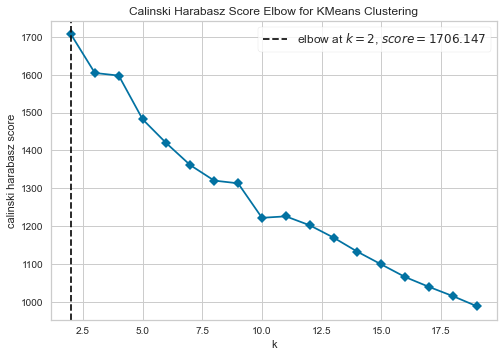

In [53]:
from yellowbrick.cluster import KElbowVisualizer
methods = ['distortion', 'silhouette', 'calinski_harabasz']
for i in methods:
    print(i)
    visualizer = KElbowVisualizer(kmeans, k=(2,20), metric = i, timings = False)
    visualizer.fit(X)
    visualizer.show()

In [54]:
kmeans = KMeans(n_clusters = 9, init = 'k-means++', random_state = 42)
y_means = kmeans.fit_predict(X)
y_means

array([1, 2, 8, ..., 0, 0, 0])

In [ ]:
plt.figure(figsize=(15,15))
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel(' Distances')
plt.show()

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [77]:
>>> x

array([[ 5],
       [15],
       [25],
       [35],
       [45],
       [55]])

In [62]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

In [67]:
model = LinearRegression()

In [68]:
model.fit(x, y)
LinearRegression()

LinearRegression()

In [69]:
model = LinearRegression().fit(x, y)

In [71]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.715875613747954


In [72]:
print(f"intercept: {model.intercept_}")

intercept: 5.633333333333329


In [73]:
print(f"slope: {model.coef_}")


slope: [0.54]


In [74]:
y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")

predicted response:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


In [75]:
>>> x

array([[ 5],
       [15],
       [25],
       [35],
       [45],
       [55]])